<a href="https://colab.research.google.com/github/sizhky/icevision/blob/master/dental-notebooks/Retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!ls

'=5.1'	 install_colab.sh   sample_data   test5   test6   test6.zip


In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-08-07 03:54:22--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-07 03:54:22 (62.9 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:69
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/1000 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/800 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 508) - Clipping bbox ymax from 902 to image height 896 (Before: <BBox (xmin:1206, ymin:873, xmax:1240, ymax:902)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 508) - Clipping bbox ymax from 902 to image height 896 (Before: <BBox (xmin:1274, ymin:873, xmax:1308, ymax:902)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 831) - Clipping bbox ymax from 850 to image height 849 (Before: <BBox (xmin:1152, ymin:823, xmax:1184, ymax:850)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 831) - Clipping bbox ymax from 850 to image height 849 (Before: <BBox (xmin:1216, ymin:823, xmax:1248, ymax:850)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 111) - Clipping bbox ymax from 918 to image height 916 (Before: <BBox (xmin:1234, ymin:889, xmax:1269, ymax:918)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 111) - Clipping

  0%|          | 0/200 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 54) - Clipping bbox ymax from 755 to image height 746 (Before: <BBox (xmin:1008, ymin:731, xmax:1036, ymax:755)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 54) - Clipping bbox ymax from 755 to image height 746 (Before: <BBox (xmin:1064, ymin:731, xmax:1091, ymax:755)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 346) - Clipping bbox ymax from 652 to image height 645 (Before: <BBox (xmin:870, ymin:632, xmax:894, ymax:652)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 346) - Clipping bbox ymax from 652 to image height 645 (Before: <BBox (xmin:918, ymin:632, xmax:943, ymax:652)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 380) - Clipping bbox ymax from 668 to image height 661 (Before: <BBox (xmin:891, ymin:647, xmax:916, ymax:668)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 380) - Clipping bbox ym

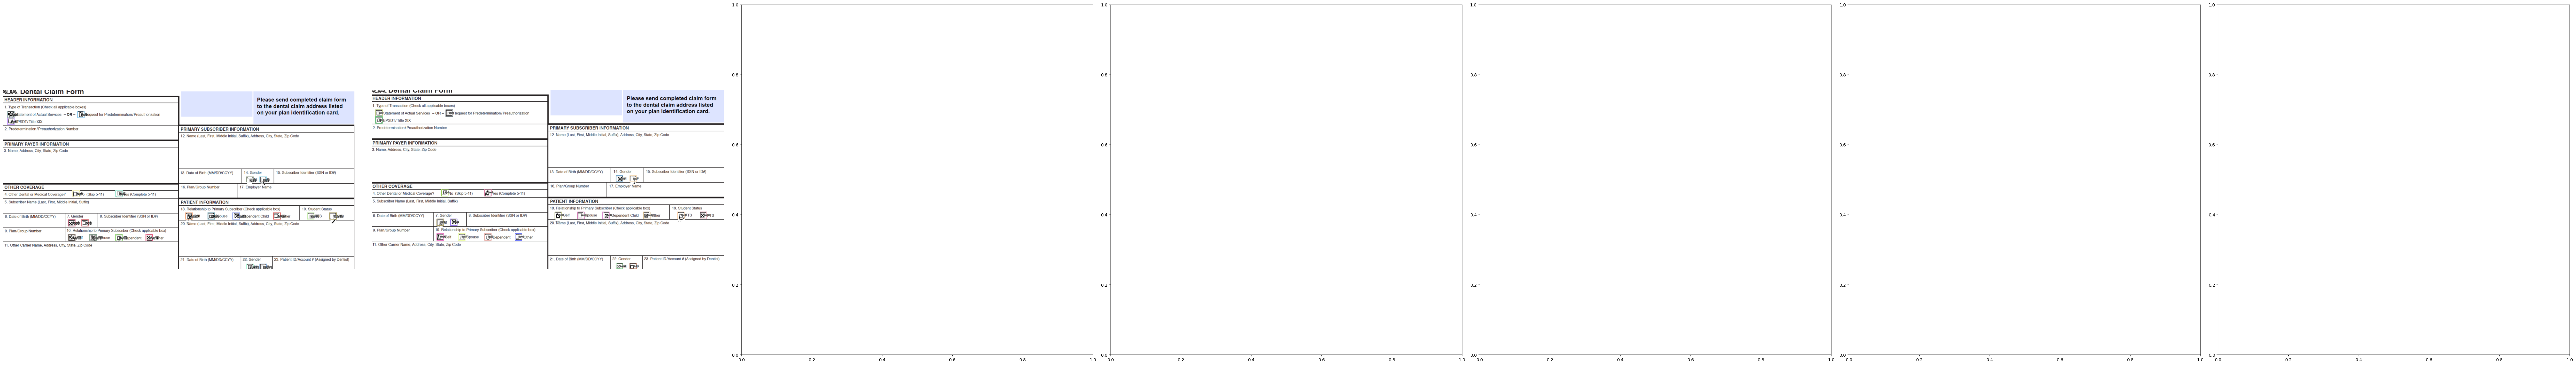

In [ ]:
from icevision.all import *
data_dir = Path('drive/My Drive/icevision/test5')
images_dir = data_dir / 'images'
annotations_dir = data_dir / 'annotations'
class_map = ClassMap(['YES1','NO1','YES2','NO2','YES3','NO3','YES4','NO4','YES5','NO5','YES6','NO6','YES7','NO7','YES8','NO8','YES9','NO9',
                      'YES10','NO10','YES11','NO11','YES12','NO12','YES13','NO13','YES14','NO14','YES15','NO15','YES16','NO16','YES17','NO17',
                      'YES18','NO18','YES19','NO19','YES20','NO20','YES21','NO21'])
parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)
data_splitter = RandomSplitter((.8, .2))
#print(len(train_records))
#print('anurag')
train_records, valid_records = parser.parse(data_splitter)
show_records(train_records[0:2], ncols=7, class_map=class_map)

In [ ]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [ ]:
extra_args = {}
model_type = models.torchvision.retinanet
backbone = model_type.backbones.resnet50_fpn(pretrained=True)
model_type, backbone, extra_args

(<module 'icevision.models.torchvision.retinanet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/torchvision/retinanet/__init__.py'>,
 {})

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


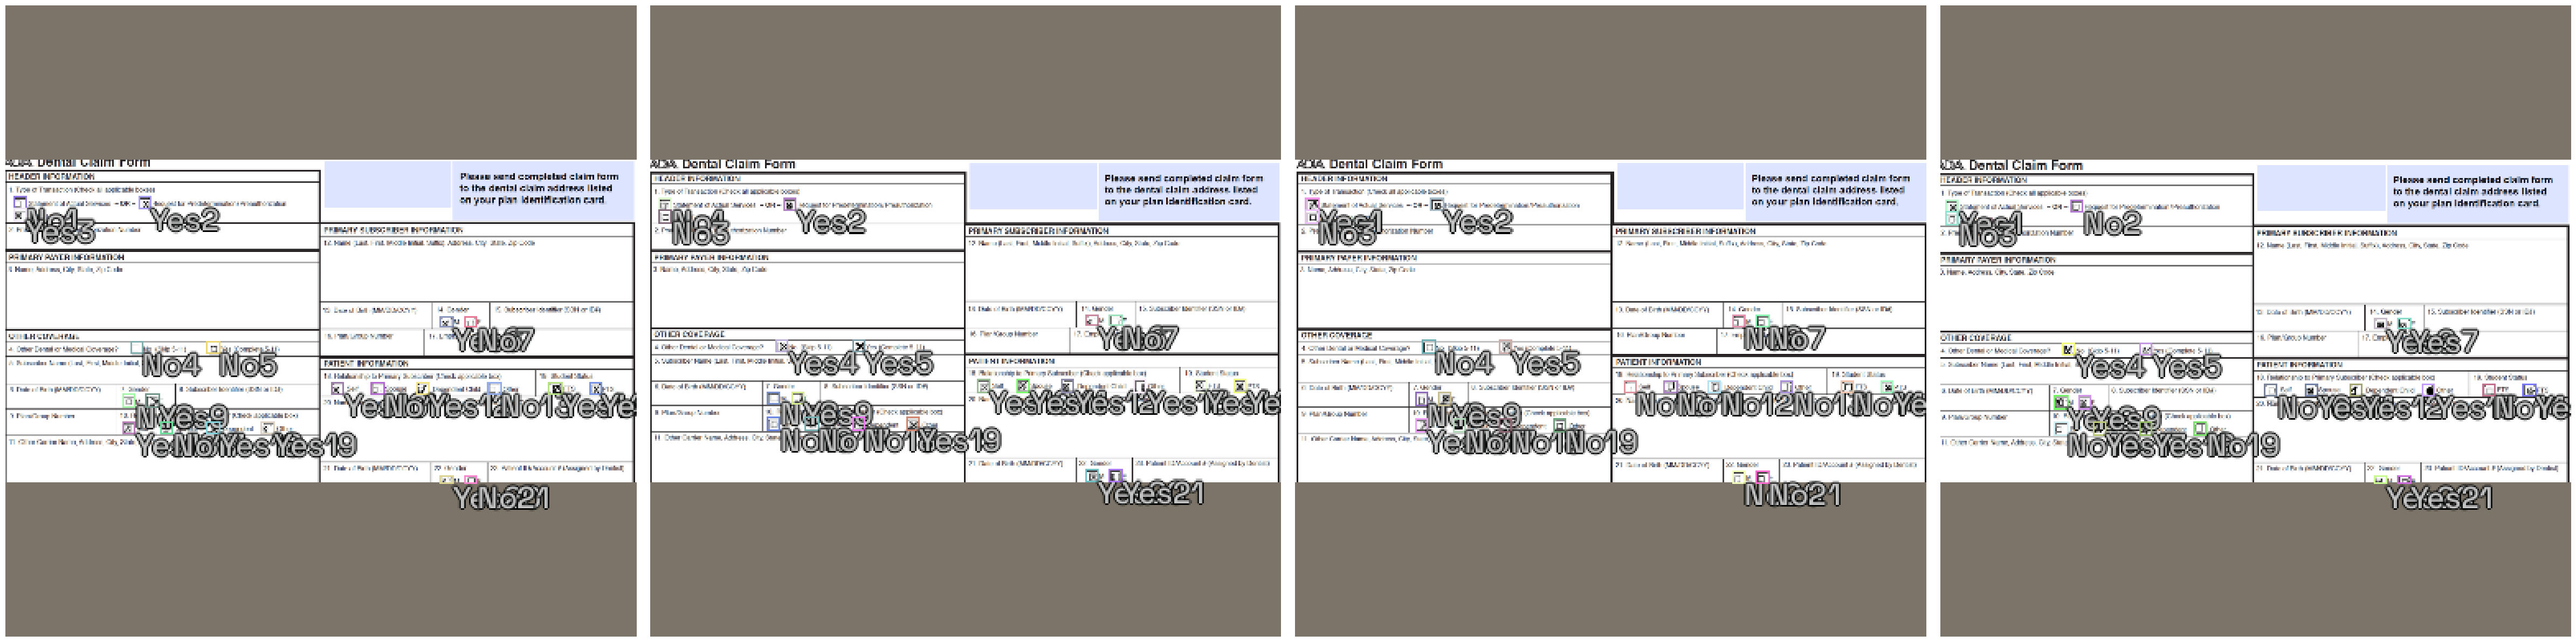

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size=4, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=4, num_workers=4, shuffle=False)
model_type.show_batch(first(valid_dl), ncols=4)

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=7.585775892948732e-05)

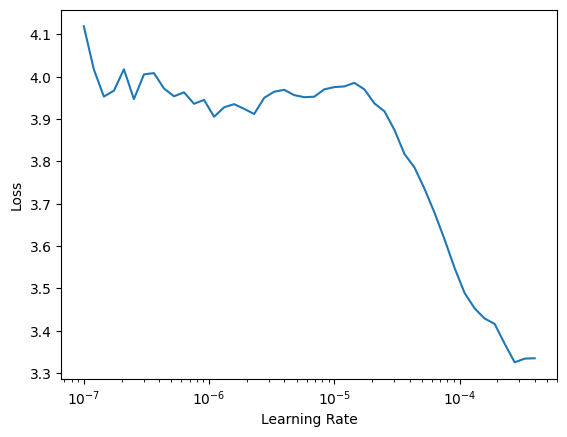

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)
learn.lr_find()

In [ ]:
learn.fine_tune(50, 1e-4, freeze_epochs=3)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.752494,1.402915,0.000052,02:21
1,1.116426,1.005112,0.000497,01:11
2,0.880654,0.773056,0.005161,01:12


epoch,train_loss,valid_loss,COCOMetric,time
0,0.717078,0.647564,0.015724,01:19
1,0.675898,0.605878,0.017790,01:19
2,0.638043,0.694041,0.019963,01:21
3,0.602713,0.626503,0.030146,01:19
4,0.582947,0.554361,0.039543,01:22
5,0.544203,0.483564,0.054964,01:20
6,0.511352,0.450879,0.056901,01:20
7,0.498446,0.442216,0.073640,01:20
8,0.471583,0.557865,0.087819,01:20
9,0.476801,0.421547,0.098529,01:20


In [ ]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=1, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, detection_threshold=0.35, keep_images=True)

  0%|          | 0/200 [00:00<?, ?it/s]

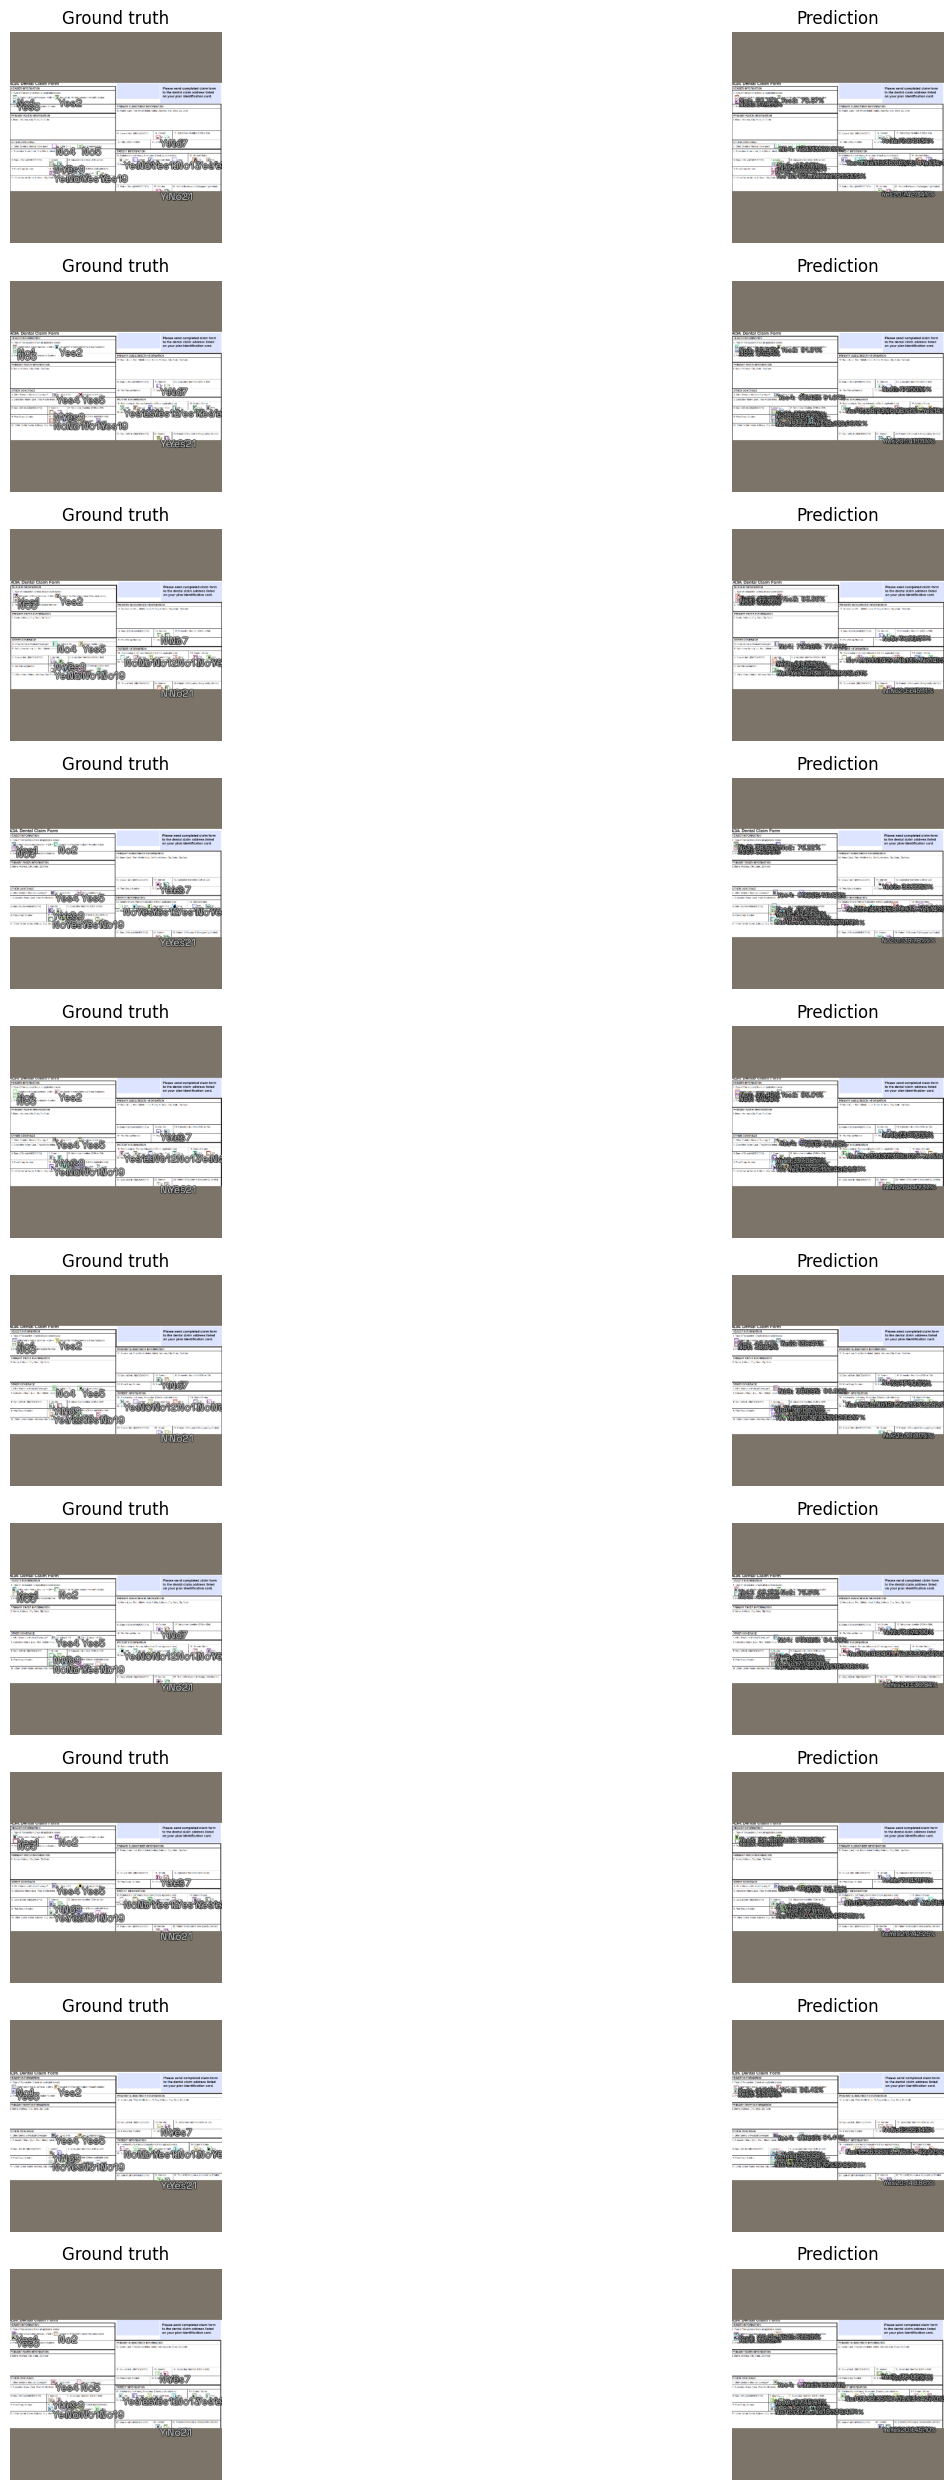

In [ ]:
N = 10
show_preds(preds=preds[:N], figsize=(20,int(2.5*N)), ncols=2)

In [ ]:
!pip install torch_snippets
from torch_snippets import load_torch_model_weights_to, save_torch_model_weights_from, makedir
makedir('drive/My Drive/icevision')
save_torch_model_weights_from(model, 'Retinanet.pth')

     |████████████████████████████████| 209 kB 14.6 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 


WARNING  - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego' | torch_snippets:<module>:14
INFO     - Saved weights of size ~126 MB to Retinanet.pth | __main__:<module>:4
